# Prática 8 - 18/10/2018

## Prazo de Entrega: 25/10 - 11h00
  
## Equipe:
- Andre Moreira Souza - 9778985
- Bruno Mendes da Costa - 9779433

## Datasets escolhidos:
- Titanic

## Produzido e testado com o Google Colaboratory
https://colab.research.google.com/

# Importação

In [0]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#warnings.filterwarnings('ignore')
sns.set()

# Classificador

Estaremos utilizando as funções de classificação fornecidas pelo PAE da disciplina, para poder executar a atividade prática.

In [0]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):            
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'clfs_names':clfs_names}



# Dataset: Titanic

In [3]:
# Download do dataset escolhido (titanic)
!wget https://dl.dropboxusercontent.com/s/i7wa80nxrpec6y0/test.csv -O test.csv
!wget https://dl.dropboxusercontent.com/s/2506bg1ahfrvzhn/train.csv -O train.csv
  

--2018-10-25 12:38:31--  https://dl.dropboxusercontent.com/s/i7wa80nxrpec6y0/test.csv
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.82.6, 2620:100:6032:6::a27d:5206
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.82.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>]  27.96K  --.-KB/s    in 0.04s   

2018-10-25 12:38:32 (736 KB/s) - ‘test.csv’ saved [28629/28629]

--2018-10-25 12:38:34--  https://dl.dropboxusercontent.com/s/2506bg1ahfrvzhn/train.csv
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.82.6, 2620:100:6032:6::a27d:5206
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.82.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB

>>>>> ## Atributos:

| Variable 	| Definition                                 	| Key 	|
|----------	|--------------------------------------------	|-----	|
| PassengerId | id | |
| survival 	| Survival                                   	| 0 = No, <br>1 = Yes   	|
| pclass   	| Ticket class                               	| 1 = 1st, <br>2 = 2nd,<br> 3 = 3rd   	|
| sex      	| Sex                                        	|     	|
| Age      	| Age in years                               	|     	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|     	|
| parch    	| # of parents / children aboard the Titanic 	|     	|
| ticket   	| Ticket number                              	|     	|
| fare     	| Passenger fare                             	|     	|
| cabin    	| Cabin number                               	|     	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, <br>Q = Queenstown, <br>S = Southampton   	|





In [0]:
# Importando dataset
# Para esta atividade, iremos remover atributos que não influenciam no atributo classe
# ou que têm muitos valores faltantes
full = pd.read_csv("./train.csv").append(pd.read_csv("./test.csv"), ignore_index=True)
del full['Name'], full['Ticket'], full['Cabin'], full['Embarked'], full['Fare'], full['PassengerId']
titanic = full[:891]
#titanic

In [0]:
# Função para separar variáveis em atributos binários
def create_bins(df, column):
  dummies = pd.get_dummies(df[column], prefix=column)
  df = pd.concat([df,dummies], axis=1)
  return df

dataset = create_bins(create_bins(titanic, "Pclass"), "Sex")
cols = dataset.columns.tolist()
cols.remove("Survived")
cols.append("Survived")
dataset = dataset[cols]
del dataset["Pclass"], dataset["Sex"]
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())

In [6]:
# Visualização dos atributos utilizados nesta prática
dataset.head()

,Age,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived
0,22.0,0,1,0,0,1,0,1,0.0
1,38.0,0,1,1,0,0,1,0,1.0
2,26.0,0,0,0,0,1,1,0,1.0
3,35.0,0,1,1,0,0,1,0,1.0
4,35.0,0,0,0,0,1,0,1,0.0


# 1- Realizar 10-fold Cross-Validation nos algoritmos da prática passada utilizando as métricas vista na aula de hoje (acurácia, precisão, revocação, sensitividade, especificidade, medida-F e média harmônica). 

In [7]:
# Verificando balanceamento das classes
s0, s1 = [], []
s0.append(dataset[dataset['Survived']==0]['Survived'].count())
s0.append(s0[0]/dataset['Survived'].count())
s1.append(dataset[dataset['Survived']==1]['Survived'].count())
s1.append(s1[0]/dataset['Survived'].count())
print("Sobreviventes:\t" + str(s1[0]) + ";\t " + str(s1[1]) + "%;")
print("Mortos:\t\t" + str(s0[0]) + ";\t " + str(s0[1]) + "%;")

Sobreviventes:	342;	 0.3838383838383838%;
Mortos:		549;	 0.6161616161616161%;


In [0]:
# Função que calcula a medida de especificidade.
def specificity_score(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)    
    tn, fp, fn, tp = cm.ravel()  
    result = tn/(tn+fp)    
    return result  

Columns: [0, 1, 2, 3, 4, 5, 6, 7]
Target: 8


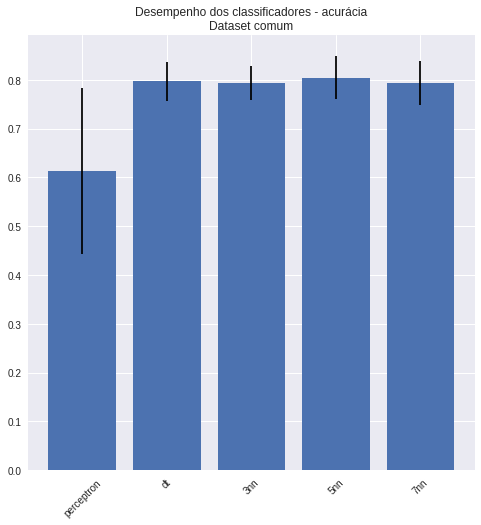

Valores de Acurácia com o 10-fold Cross-Validation para o PERCEPTRON.
[0.8426966292134831, 0.7865168539325843, 0.7752808988764045, 0.7555555555555555, 0.6853932584269663, 0.5617977528089888, 0.5280898876404494, 0.4606741573033708, 0.3707865168539326, 0.3595505617977528]
Média: 0.61
Mediana: 0.62

Valores de Acurácia com o 10-fold Cross-Validation para o DT.
[0.8539325842696629, 0.8426966292134831, 0.8333333333333334, 0.8202247191011236, 0.8089887640449438, 0.7865168539325843, 0.7865168539325843, 0.7528089887640449, 0.7528089887640449, 0.7303370786516854]
Média: 0.80
Mediana: 0.80

Valores de Acurácia com o 10-fold Cross-Validation para o 3NN.
[0.8539325842696629, 0.8314606741573034, 0.8202247191011236, 0.8089887640449438, 0.797752808988764, 0.7888888888888889, 0.7865168539325843, 0.7528089887640449, 0.7528089887640449, 0.7415730337078652]
Média: 0.79
Mediana: 0.79

Valores de Acurácia com o 10-fold Cross-Validation para o 5NN.
[0.9101123595505618, 0.8314606741573034, 0.8202247191011236

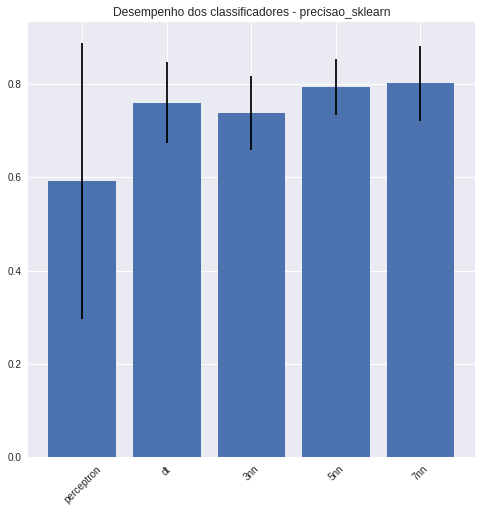

Valores de Precisão com o 10-fold Cross-Validation para o PERCEPTRON.
[1.0, 0.9375, 0.8421052631578947, 0.7727272727272727, 0.65, 0.5517241379310345, 0.5, 0.35294117647058826, 0.313953488372093, 0.0]
Média: 0.59
Mediana: 0.60

Valores de Precisão com o 10-fold Cross-Validation para o DT.
[0.972972972972973, 0.84375, 0.7777777777777778, 0.7714285714285715, 0.7586206896551724, 0.72, 0.7096774193548387, 0.7037037037037037, 0.6875, 0.65625]
Média: 0.76
Mediana: 0.74

Valores de Precisão com o 10-fold Cross-Validation para o 3NN.
[0.8529411764705882, 0.8461538461538461, 0.8076923076923077, 0.7857142857142857, 0.7407407407407407, 0.7142857142857143, 0.6857142857142857, 0.6829268292682927, 0.6666666666666666, 0.6]
Média: 0.74
Mediana: 0.73

Valores de Precisão com o 10-fold Cross-Validation para o 5NN.
[0.9032258064516129, 0.8787878787878788, 0.8484848484848485, 0.8, 0.7857142857142857, 0.7777777777777778, 0.7692307692307693, 0.7307692307692307, 0.7307692307692307, 0.7241379310344828]
Média: 

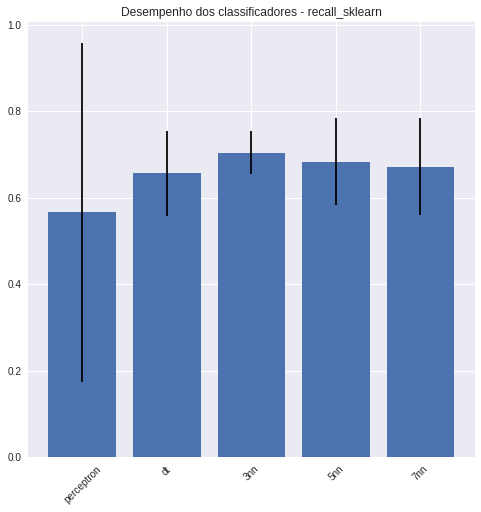

Valores de Recall com o 10-fold Cross-Validation para o PERCEPTRON.
[0.9722222222222222, 0.9722222222222222, 0.9090909090909091, 0.9090909090909091, 0.8620689655172413, 0.6097560975609756, 0.23529411764705882, 0.15625, 0.03125, 0.0]
Média: 0.57
Mediana: 0.74

Valores de Recall com o 10-fold Cross-Validation para o DT.
[0.8055555555555556, 0.7560975609756098, 0.7307692307692307, 0.7222222222222222, 0.7096774193548387, 0.631578947368421, 0.6176470588235294, 0.5588235294117647, 0.5277777777777778, 0.5]
Média: 0.66
Mediana: 0.67

Valores de Recall com o 10-fold Cross-Validation para o 3NN.
[0.7941176470588235, 0.7777777777777778, 0.75, 0.6923076923076923, 0.6896551724137931, 0.6842105263157895, 0.6774193548387096, 0.6756756756756757, 0.6666666666666666, 0.6285714285714286]
Média: 0.70
Mediana: 0.69

Valores de Recall com o 10-fold Cross-Validation para o 5NN.
[0.9210526315789473, 0.7741935483870968, 0.7428571428571429, 0.6923076923076923, 0.6764705882352942, 0.625, 0.6216216216216216, 0.6,

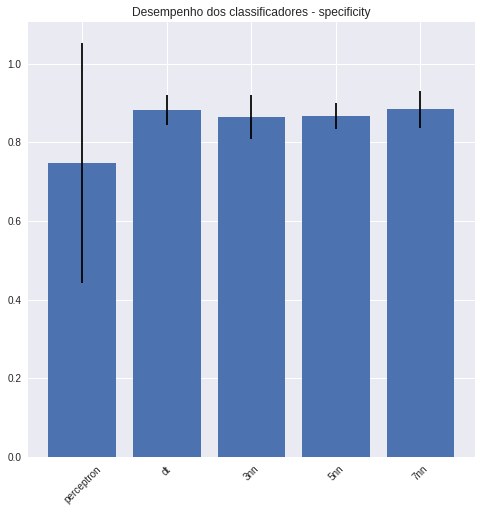

Valores de Medida-F1 com o 10-fold Cross-Validation para o PERCEPTRON.
[1.0, 1.0, 0.9672131147540983, 0.9444444444444444, 0.9122807017543859, 0.8867924528301887, 0.7368421052631579, 0.6226415094339622, 0.3793103448275862, 0.025]
Média: 0.75
Mediana: 0.90

Valores de Medida-F1 com o 10-fold Cross-Validation para o DT.
[0.9454545454545454, 0.9215686274509803, 0.9137931034482759, 0.9038461538461539, 0.8823529411764706, 0.875, 0.875, 0.8461538461538461, 0.8421052631578947, 0.819672131147541]
Média: 0.88
Mediana: 0.88

Valores de Medida-F1 com o 10-fold Cross-Validation para o 3NN.
[0.9824561403508771, 0.9230769230769231, 0.88, 0.8666666666666667, 0.8627450980392157, 0.8620689655172413, 0.8545454545454545, 0.8305084745762712, 0.8275862068965517, 0.7551020408163265]
Média: 0.86
Mediana: 0.86

Valores de Medida-F1 com o 10-fold Cross-Validation para o 5NN.
[0.9056603773584906, 0.9038461538461539, 0.8947368421052632, 0.8888888888888888, 0.8813559322033898, 0.8793103448275862, 0.851851851851851

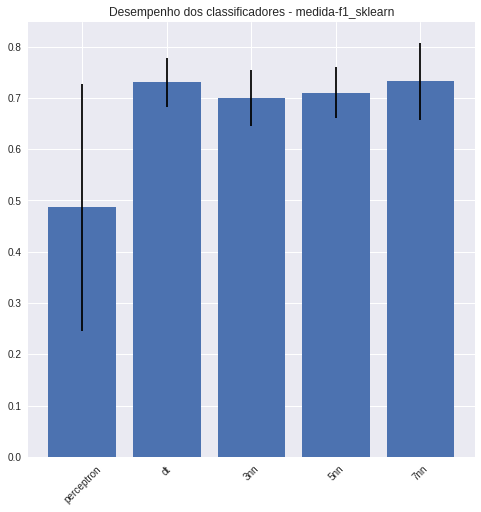

Valores de Medida-F1 com o 10-fold Cross-Validation para o PERCEPTRON.
[0.7619047619047619, 0.746987951807229, 0.689655172413793, 0.6865671641791046, 0.5737704918032787, 0.5042016806722689, 0.4424778761061947, 0.19999999999999998, 0.19512195121951217, 0.06666666666666667]
Média: 0.49
Mediana: 0.54

Valores de Medida-F1 com o 10-fold Cross-Validation para o DT.
[0.7945205479452055, 0.7733333333333334, 0.7674418604651162, 0.7636363636363636, 0.7536231884057971, 0.7241379310344829, 0.7169811320754716, 0.7096774193548386, 0.65625, 0.6428571428571429]
Média: 0.73
Mediana: 0.74

Valores de Medida-F1 com o 10-fold Cross-Validation para o 3NN.
[0.7812499999999999, 0.7575757575757576, 0.7532467532467533, 0.7352941176470588, 0.6956521739130436, 0.6909090909090909, 0.6785714285714287, 0.6666666666666667, 0.6176470588235294, 0.6153846153846153]
Média: 0.70
Mediana: 0.69

Valores de Medida-F1 com o 10-fold Cross-Validation para o 5NN.
[0.7777777777777778, 0.7719298245614036, 0.746987951807229, 0.72

In [9]:
# Medidas de Desempenho
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

target = len(dataset.columns)-1
columns = list(range(target))

print("Columns: "+ str(columns))
print("Target: " + str(target))

# OBS: Valores ordendos decrescentemente no vetor.

# Acurácia 10-fold Cross-Validation
clf_acc = classificacao(dataset, columns, target, score=accuracy_score, score_name=u'acurácia\nDataset comum', folds=10, plot=True)

for key in clf_acc['clfs_names']:      
  print("Valores de Acurácia com o 10-fold Cross-Validation para o " + key.upper() + ".\n" + str(sorted(clf_acc['results'][key], reverse=True)))
  print("Média: " + '{0:.2f}'.format(np.mean(np.asarray(clf_acc['results'][key]))))
  print("Mediana: " + '{0:.2f}'.format(np.median(np.asarray(clf_acc['results'][key]))) + "\n")   
    
# Precision 10-fold Cross-Validation
clf_pre = classificacao(dataset, columns, target, precision_score, u'precisao_sklearn', folds=10, plot=True)

for key in clf_pre['clfs_names']:      
  print("Valores de Precisão com o 10-fold Cross-Validation para o " + key.upper() + ".\n" + str(sorted(clf_pre['results'][key], reverse=True)))
  print("Média: " + '{0:.2f}'.format(np.mean(np.asarray(clf_pre['results'][key]))))
  print("Mediana: " + '{0:.2f}'.format(np.median(np.asarray(clf_pre['results'][key]))) + "\n")  
  
# Recall 10-fold Cross-Validation = Sensitivity
clf_rec = classificacao(dataset, columns, target, recall_score, u'recall_sklearn', folds=10, plot=True)

for key in clf_rec['clfs_names']:      
  print("Valores de Recall com o 10-fold Cross-Validation para o " + key.upper() + ".\n" + str(sorted(clf_rec['results'][key], reverse=True)))
  print("Média: " + '{0:.2f}'.format(np.mean(np.asarray(clf_rec['results'][key]))))
  print("Mediana: " + '{0:.2f}'.format(np.median(np.asarray(clf_rec['results'][key]))) + "\n")  
  
# Specificity 10-fold Cross-Validation
clf_spec = classificacao(dataset, columns, target, specificity_score, u'specificity', folds=10, plot=True)

for key in clf_spec['clfs_names']:      
  print("Valores de Medida-F1 com o 10-fold Cross-Validation para o " + key.upper() + ".\n" + str(sorted(clf_spec['results'][key], reverse=True)))
  print("Média: " + '{0:.2f}'.format(np.mean(np.asarray(clf_spec['results'][key]))))
  print("Mediana: " + '{0:.2f}'.format(np.median(np.asarray(clf_spec['results'][key]))) + "\n")  
  
# Medida-F1 10-fold Cross-Validation
clf_f1 = classificacao(dataset, columns, target, f1_score, u'medida-f1_sklearn', folds=10, plot=True)

for key in clf_f1['clfs_names']:      
  print("Valores de Medida-F1 com o 10-fold Cross-Validation para o " + key.upper() + ".\n" + str(sorted(clf_f1['results'][key], reverse=True)))
  print("Média: " + '{0:.2f}'.format(np.mean(np.asarray(clf_f1['results'][key]))))
  print("Mediana: " + '{0:.2f}'.format(np.median(np.asarray(clf_f1['results'][key]))) + "\n")  

## Análise das métricas

### Acurácia
Com essa métrica, todos os classificadores, exceto o *perceptron*, obtiveram resultados aceitáveis (com médias/medianas entre 78% e 81%). No entanto, esses resultados ainda não podem ser considerados "bons", pois a medida ainda está abaixo de 85% para todos os classifcadores.

Isso pode ser proveniente do desbalanceamento entre as classes do conjunto de dados utilizado, pois sabe-se que a medida de acurácia pode induzir baixas taxas de acerto para a classe minoritária.


### Precisão
Para esta medida, todos os classificadores apresentaram taxas médias de acerto abaixo de 80%, o que torna este resultado abaixo do que é considerado "bom".


### Revocação
Assim como na medida anterior, essa medida obteve resultados em torno de 60% para todos os classificadores, o que caracteriza uma medida de desempenho ruim para este problema.

Nota-se que as métricas de precisão e revocação podem estar enviesadas, pois a classe majoritária dos datasets de treino e teste é a positiva.

### Especificidade
Para todos os classificadores, exceto o *perceptron*, essa medida obteve bons resultados, entre 83% e 88%.

Dentre todas as medidas, esta foi a que teve melhor desempenho.


### Medida-F1
Essa medida obteve resultados não muito bons, com desempenho de ~55% para o *perceptron*, e em torno de 72% para os demais.

# 2- Escolha dois classificadores e plot a curva ROC e calcule a AUC para os mesmos.

In [0]:
# Réplica do Classificador com as alterações necessárias.

from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        part_count = 0
        for train_index, test_index in cv.split(data):            
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            
            #Compute Receiver operating characteristic (ROC)
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred) 	
            
            #Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
            auc = metrics.roc_auc_score(y_test, y_pred)
    
            if not plot:
                return {'results': results, 'clfs':clfs}
            # faz o plot de desempenho dos classificadores
            plt.title('Curva ROC: ' + score_name + '\n' + c_name + "_" +str(part_count)) # COLOCA O C_NAME TBM
            plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('TVP')
            plt.xlabel('TFP')
            plt.show()
            part_count = part_count + 1
    
    return {'results': results, 'clfs':clfs, 'clfs_names':clfs_names}



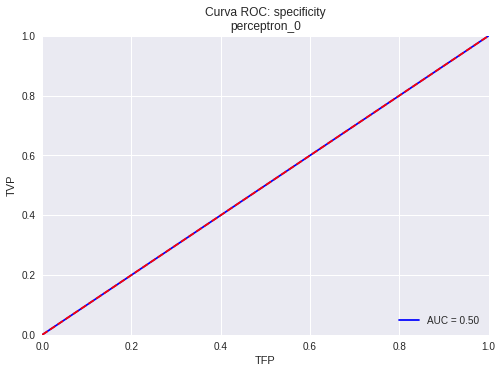

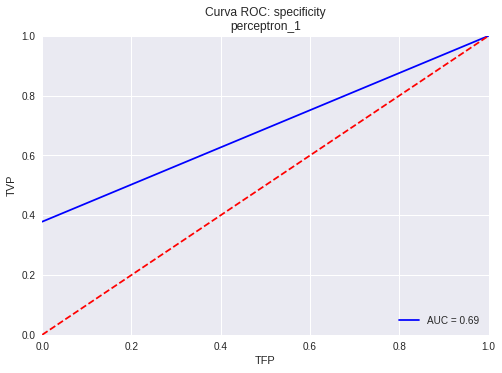

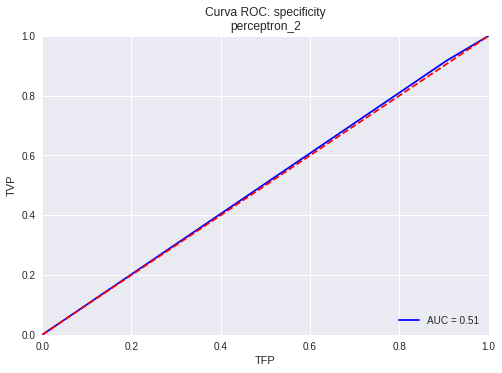

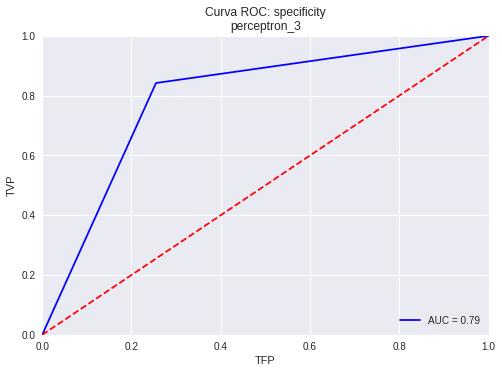

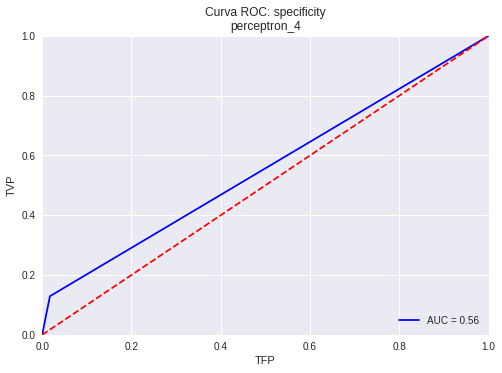

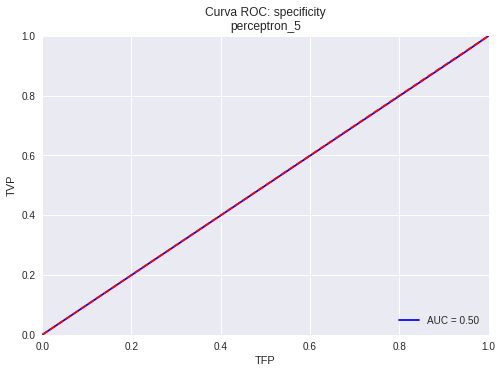

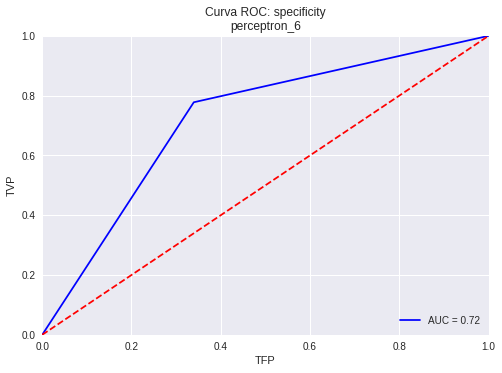

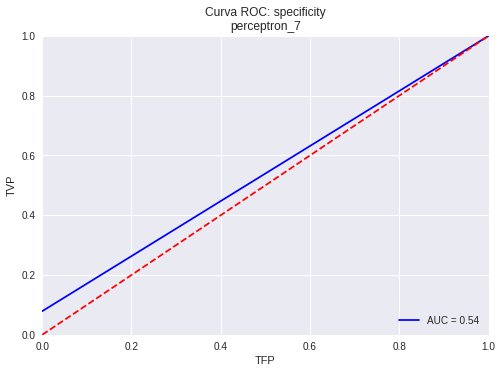

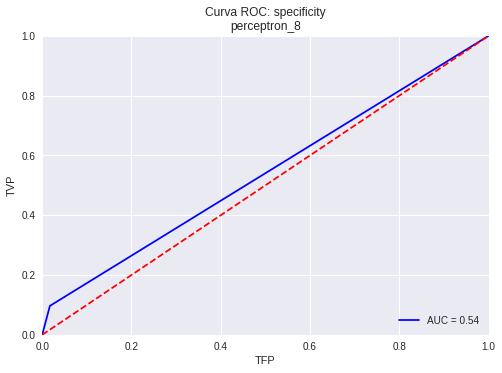

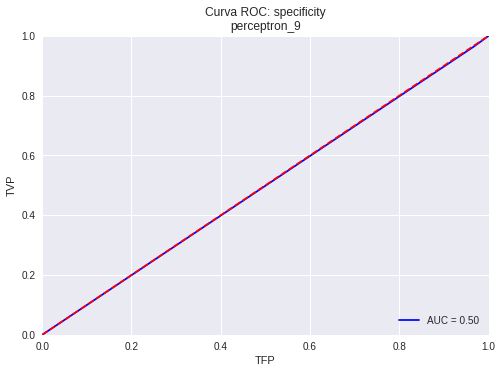

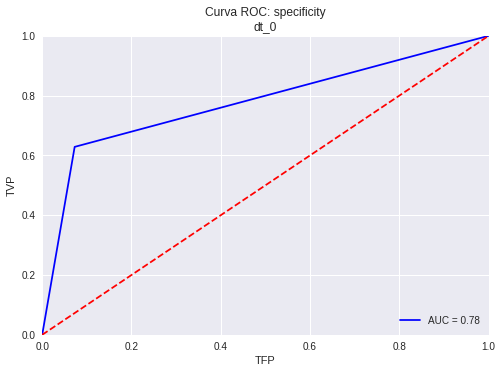

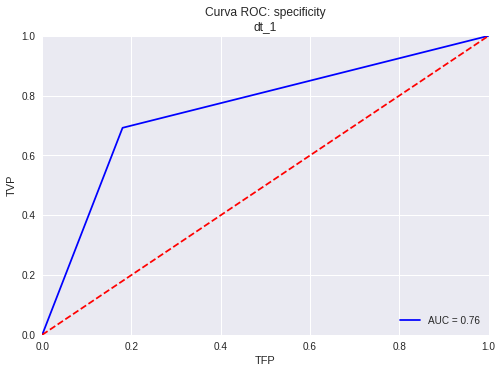

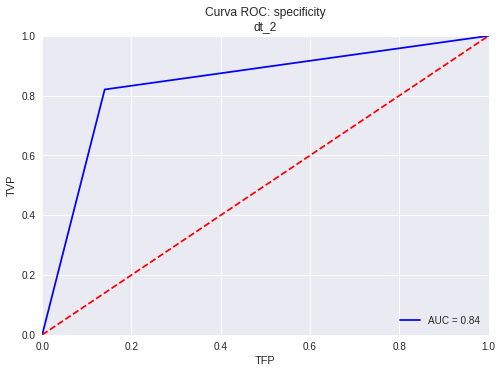

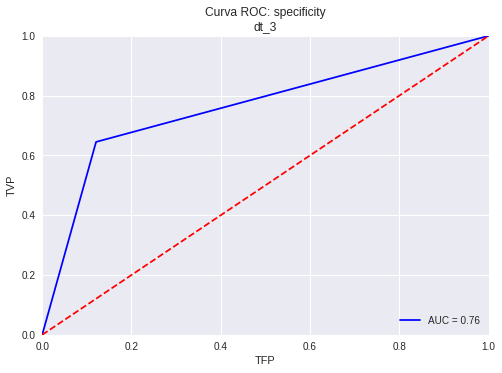

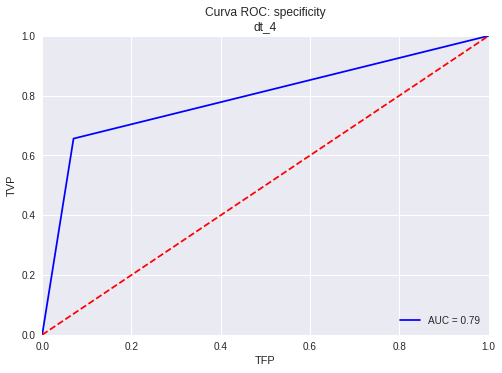

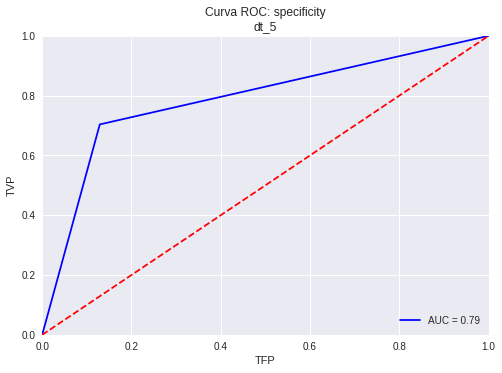

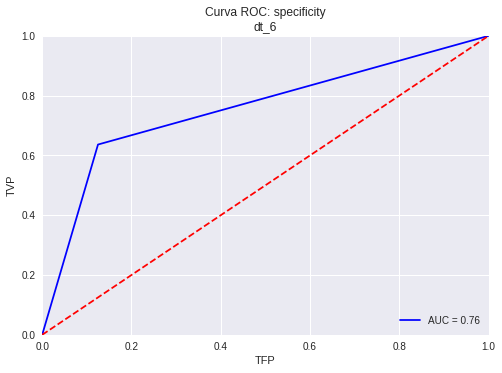

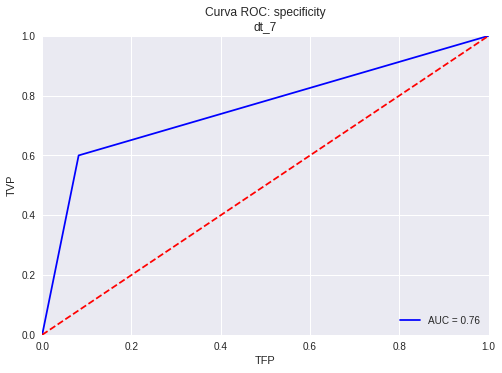

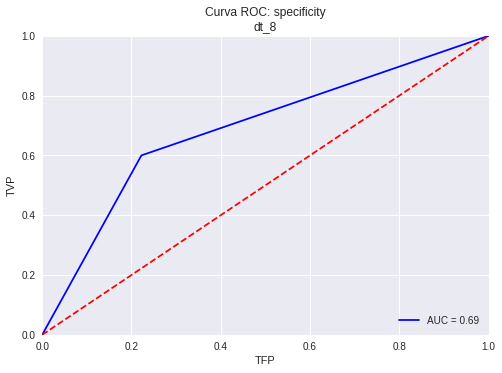

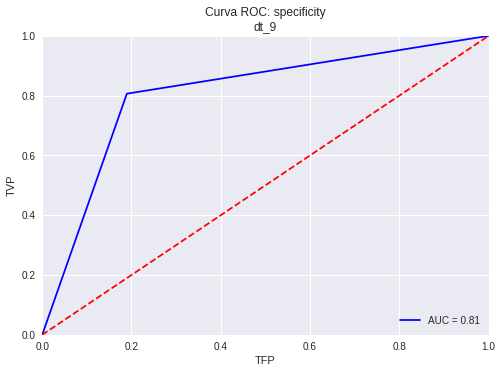

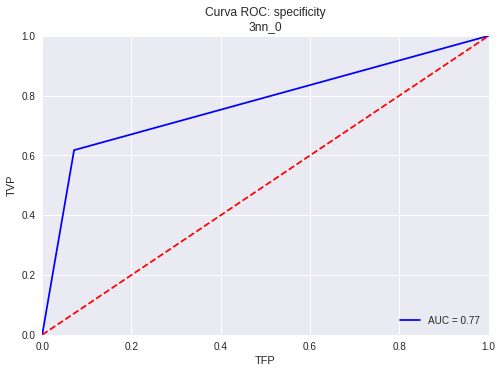

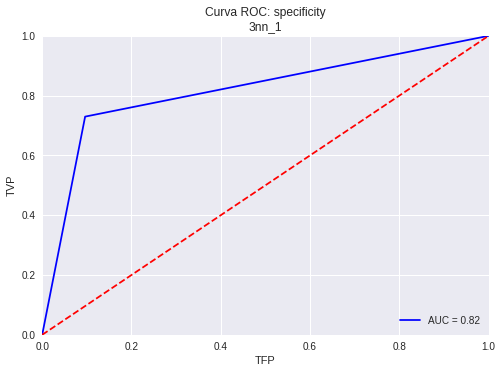

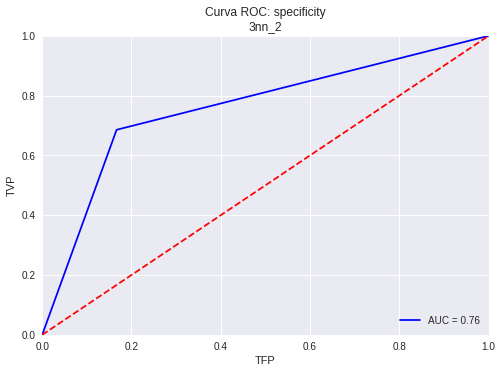

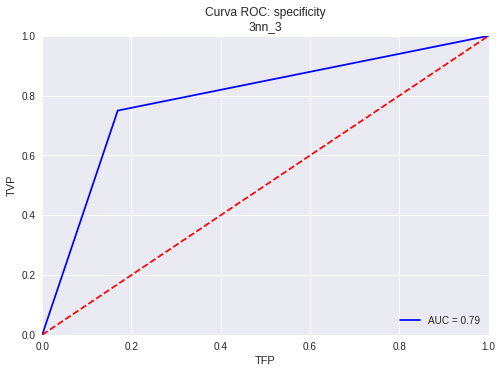

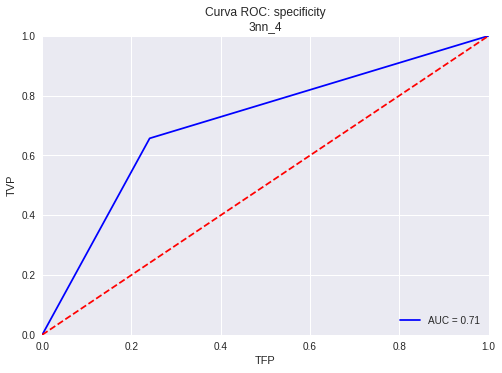

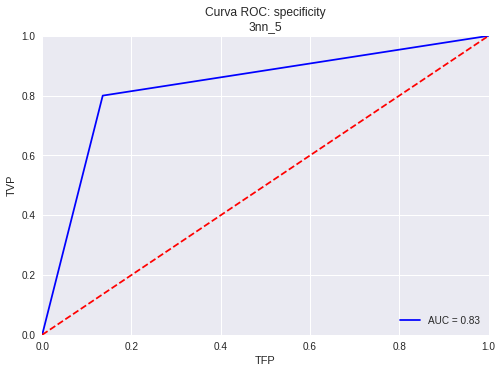

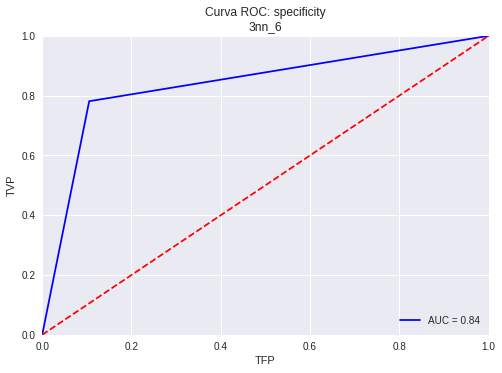

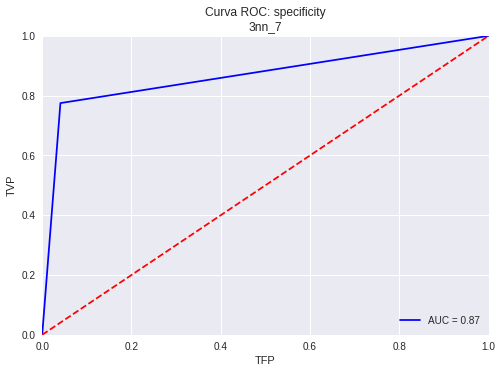

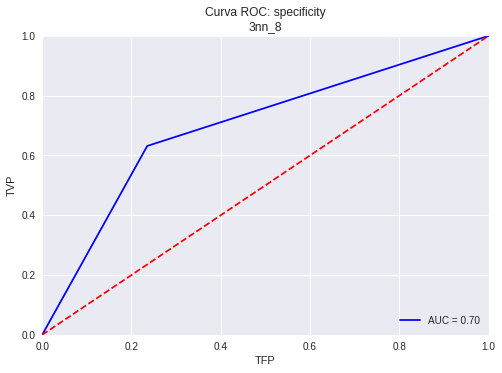

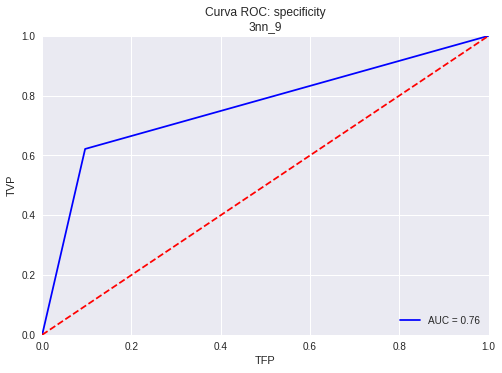

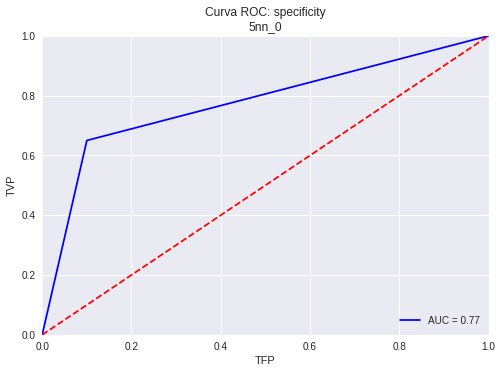

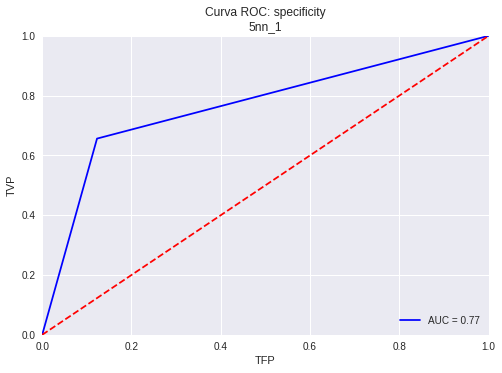

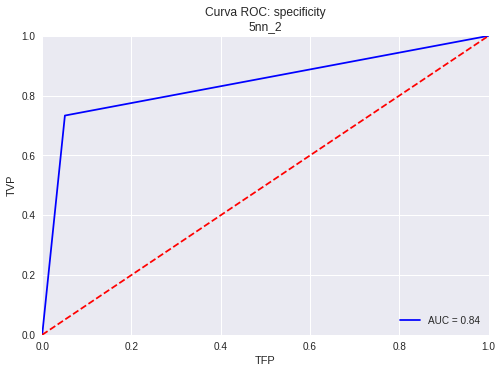

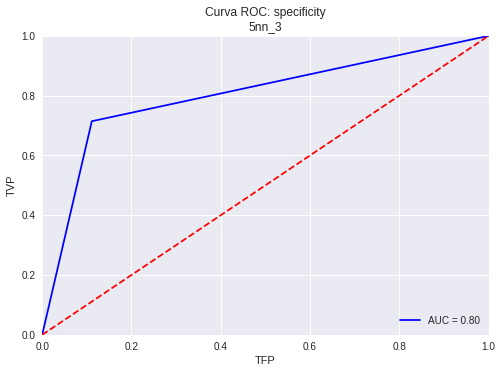

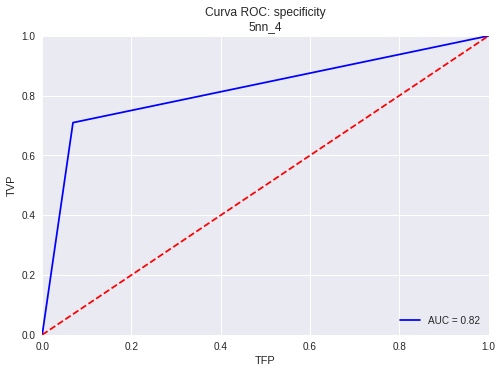

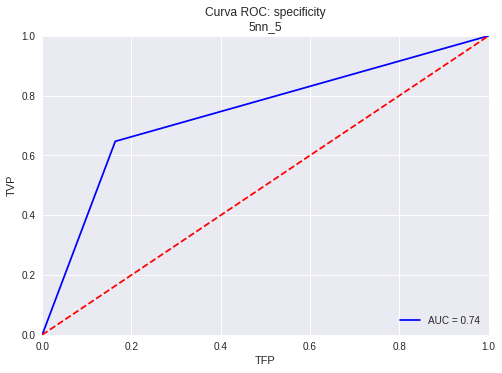

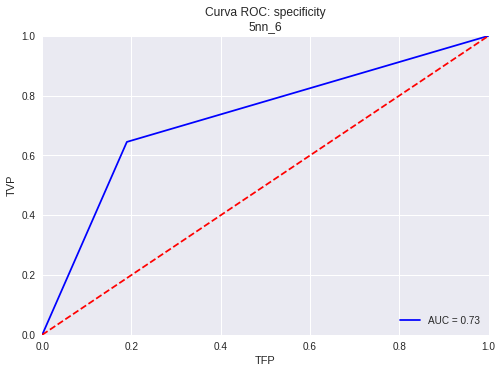

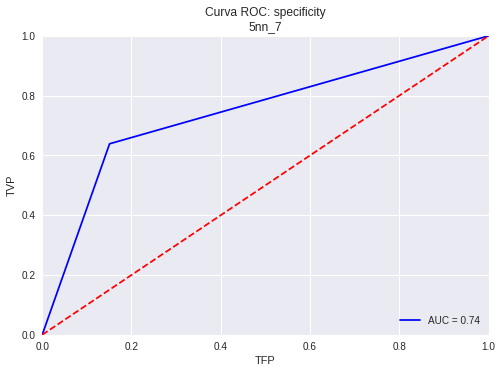

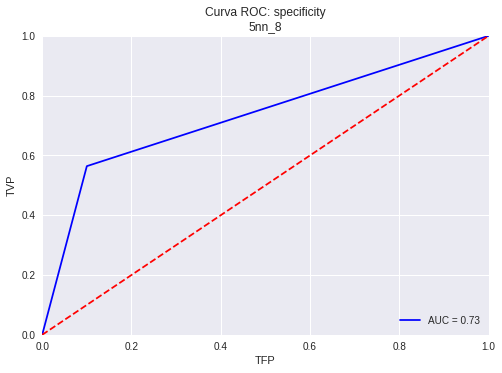

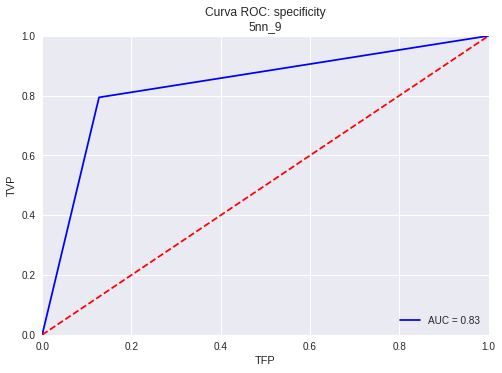

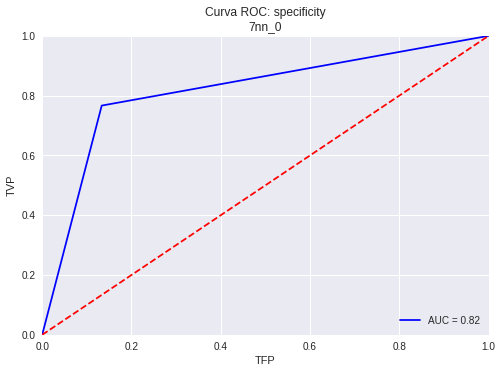

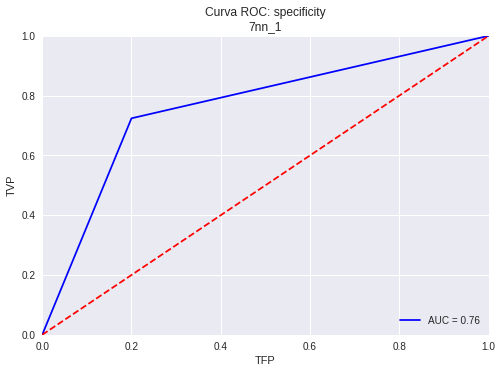

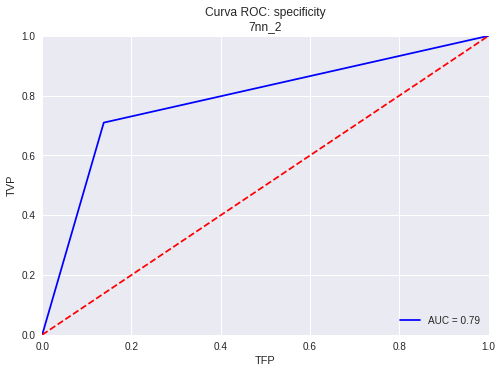

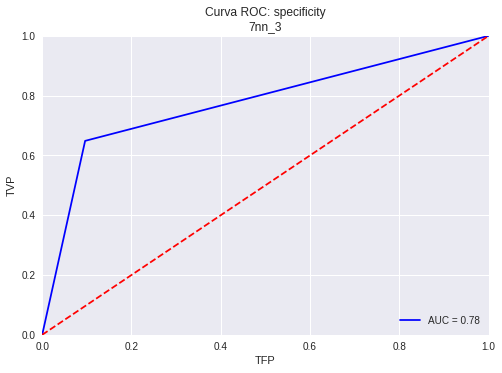

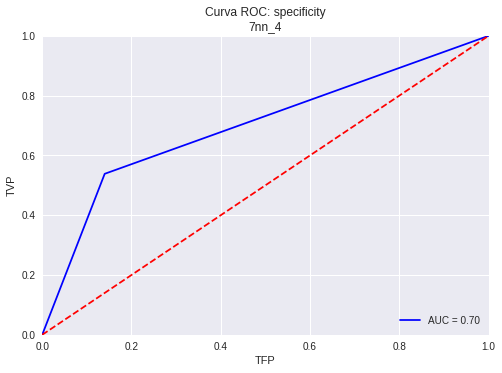

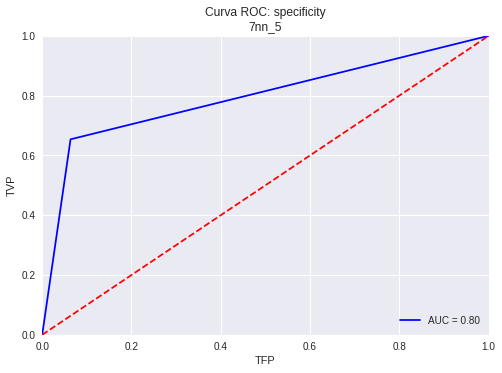

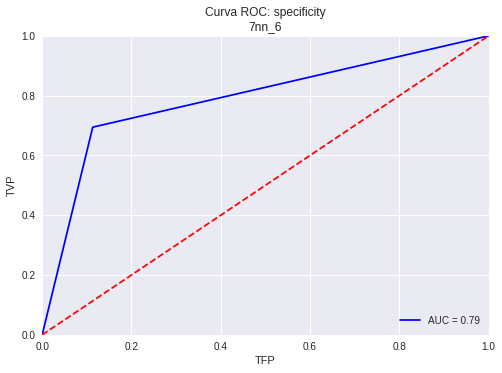

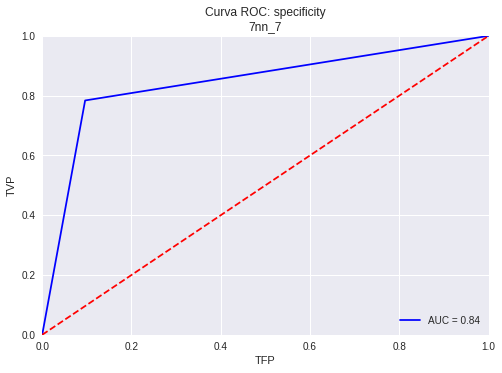

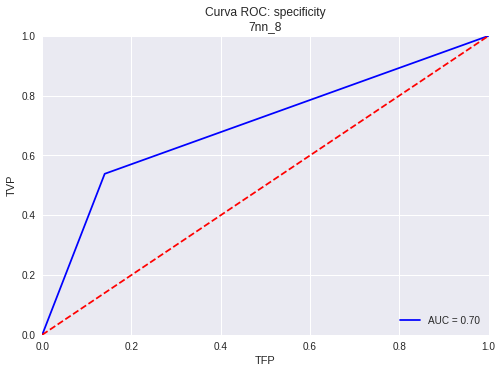

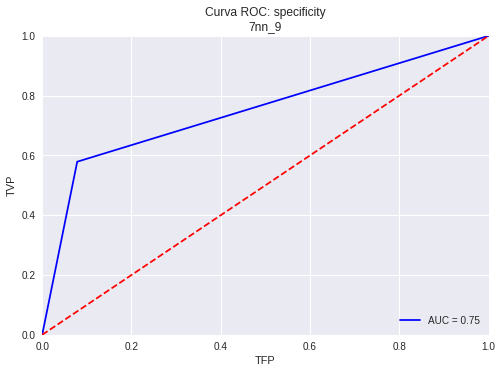

In [11]:
# Plotting ROC curve

# Specificity
clf_spec = classificacao(dataset, columns, target, specificity_score, u'specificity', folds=10, plot=True)

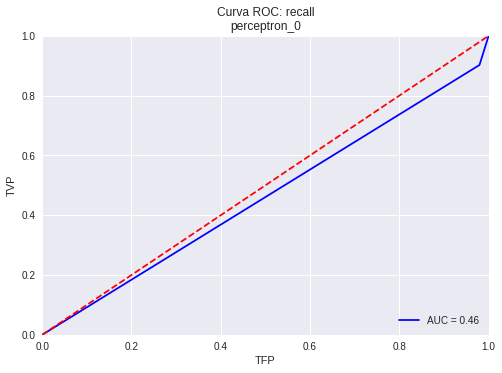

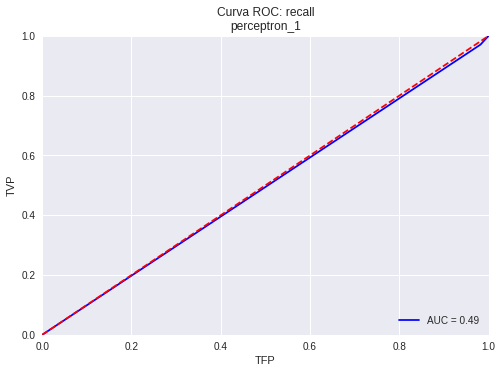

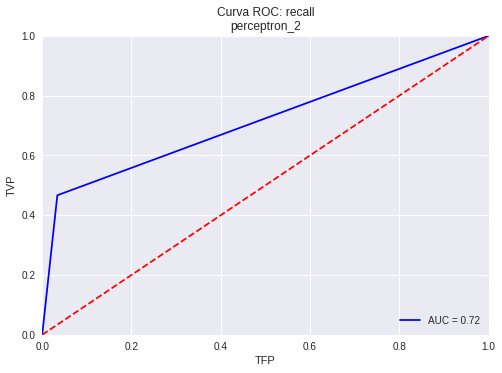

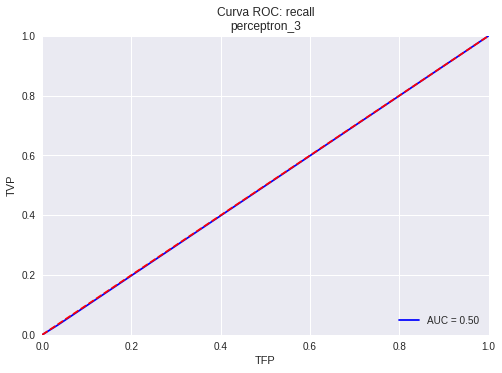

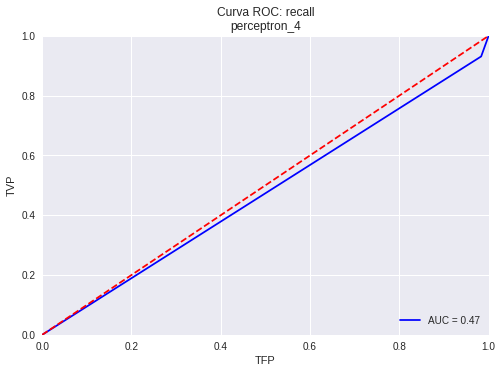

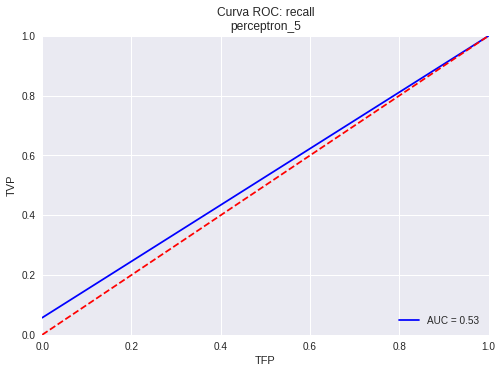

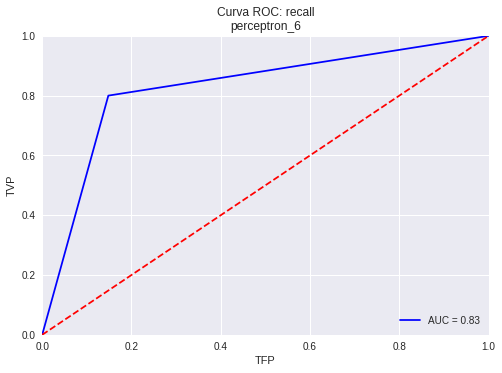

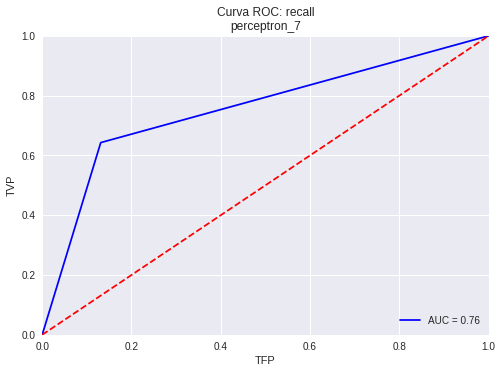

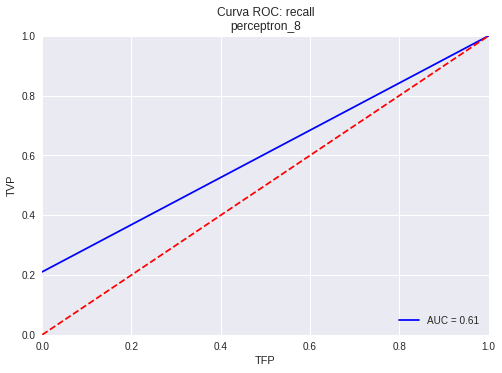

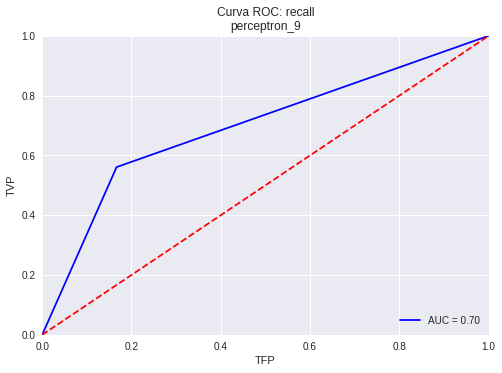

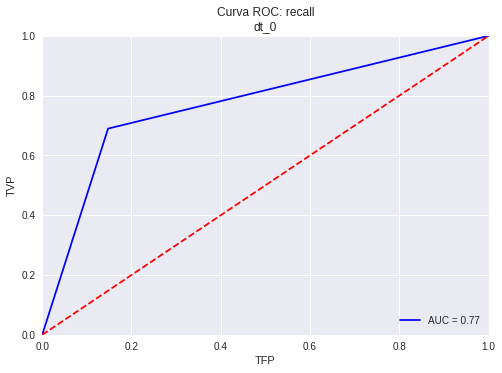

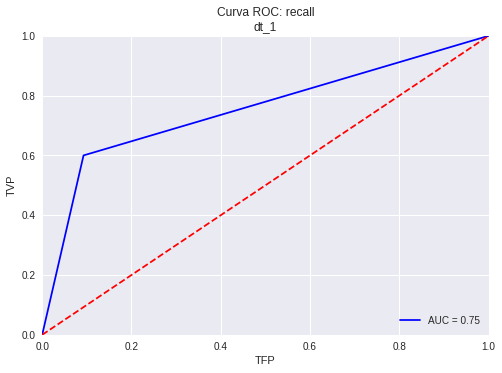

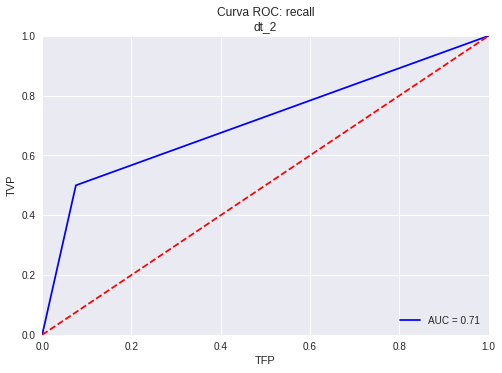

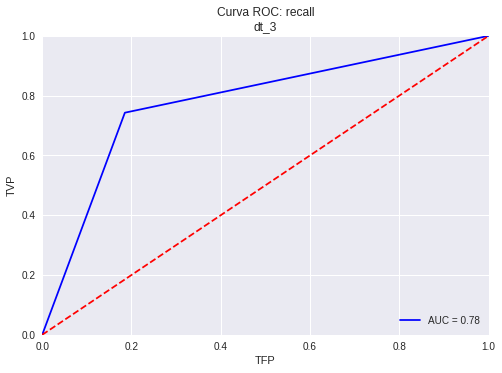

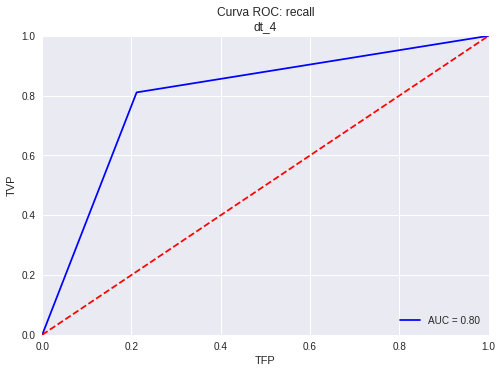

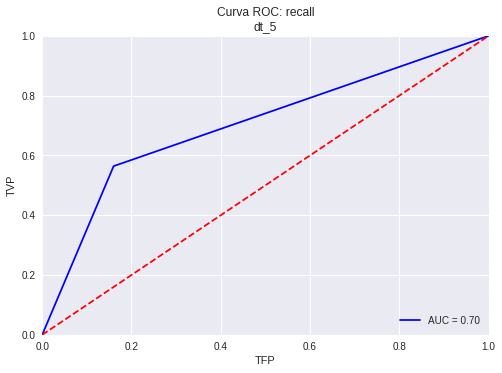

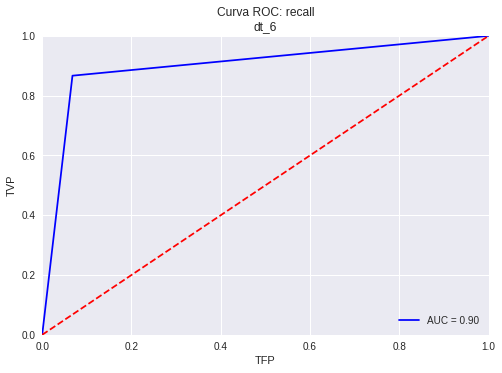

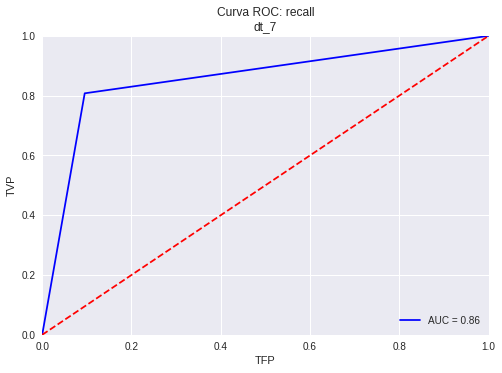

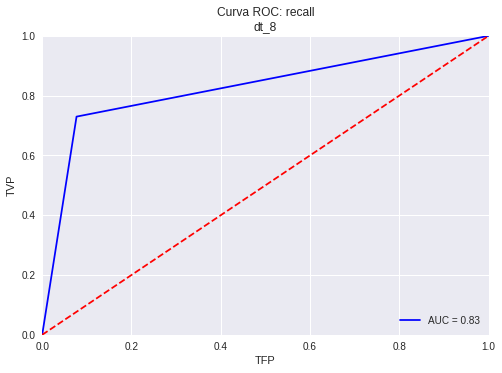

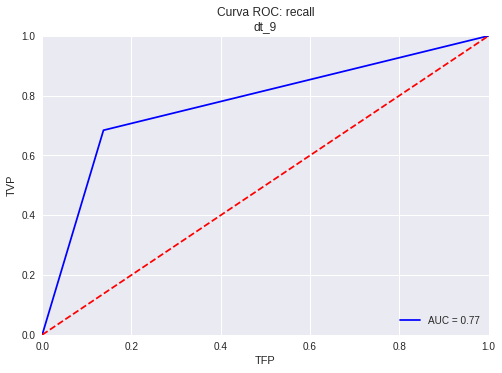

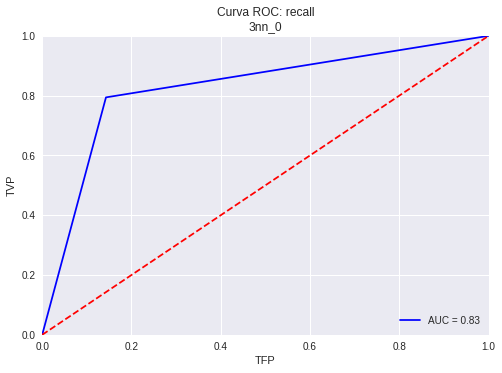

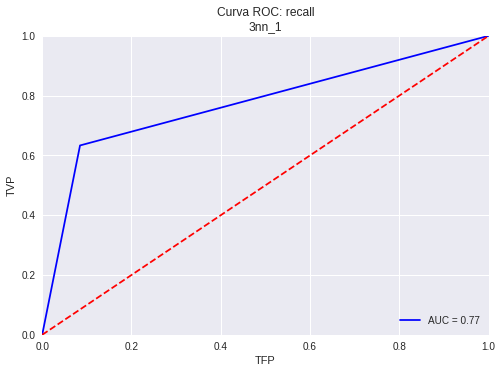

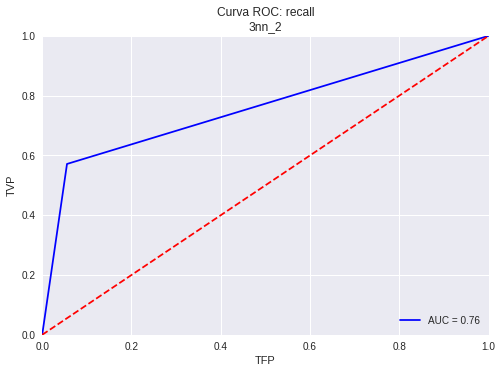

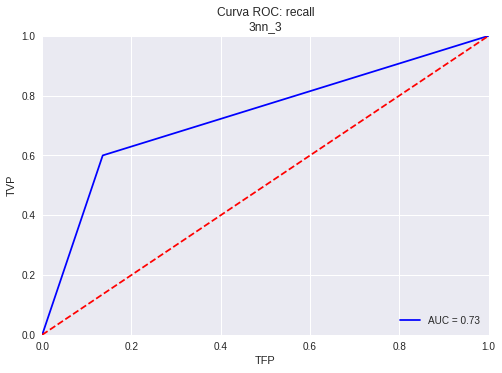

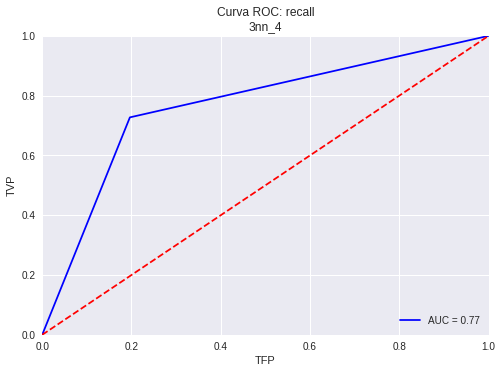

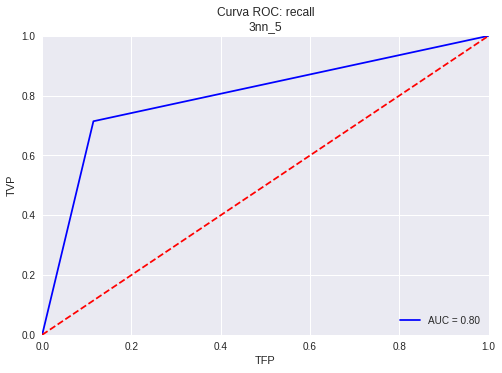

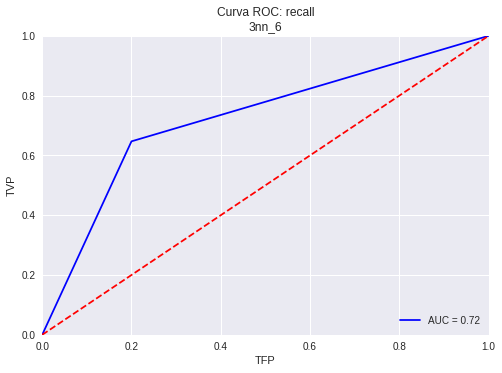

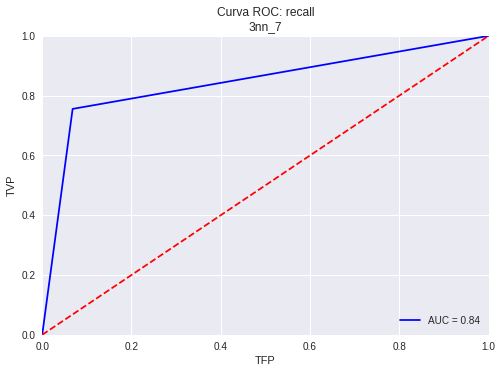

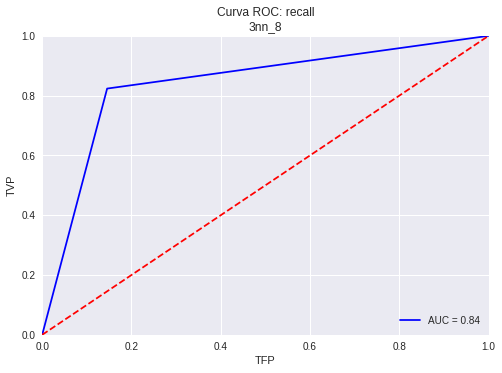

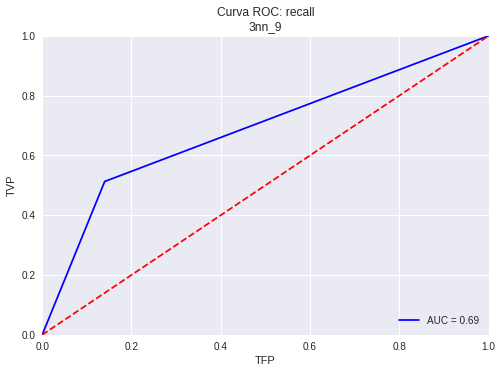

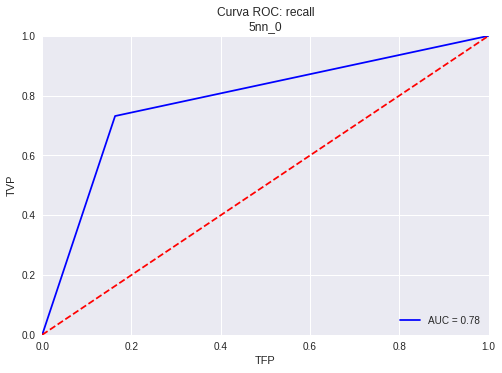

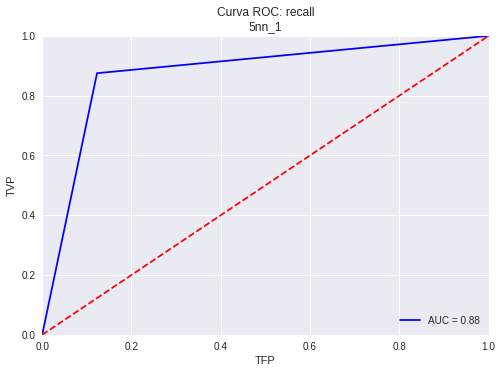

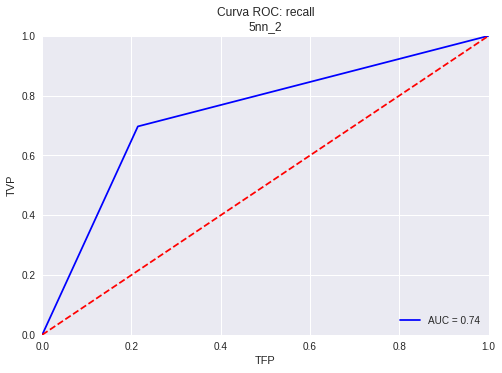

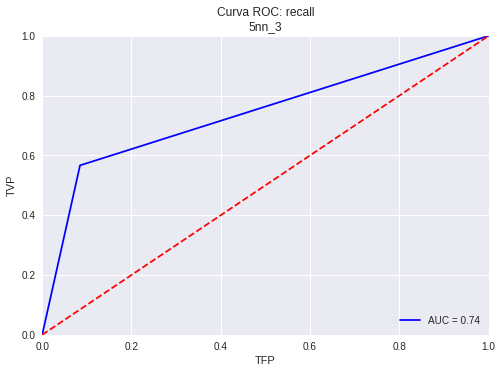

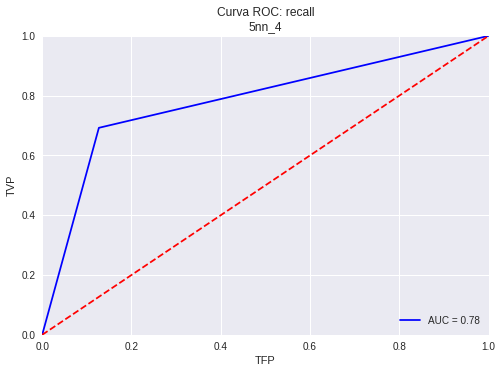

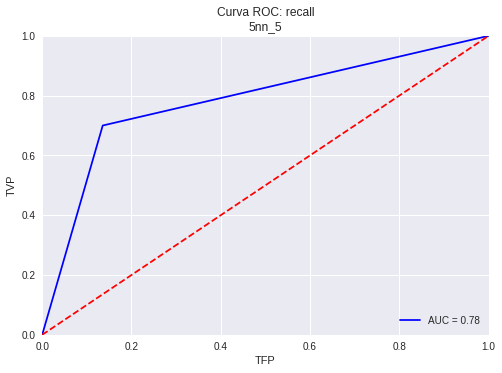

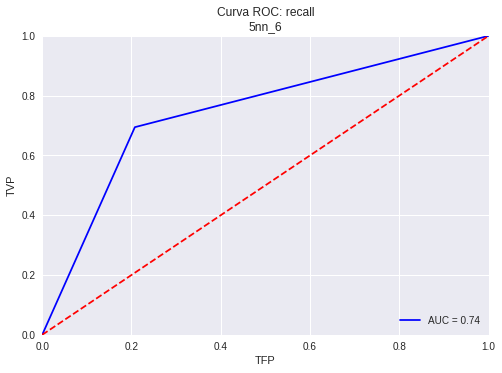

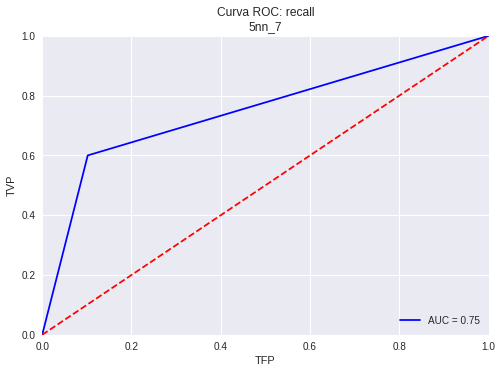

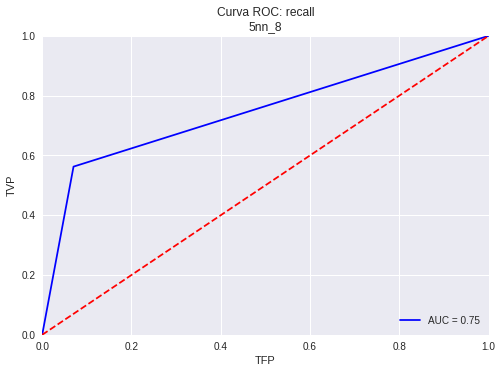

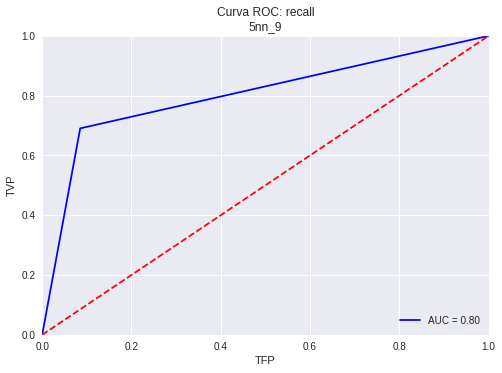

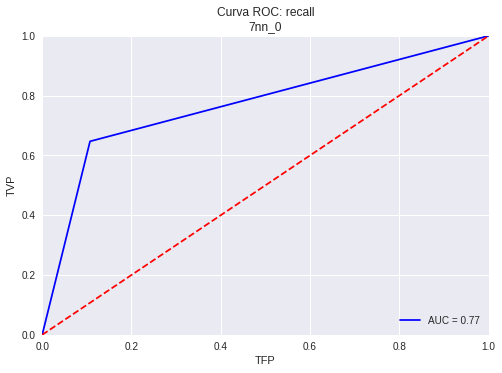

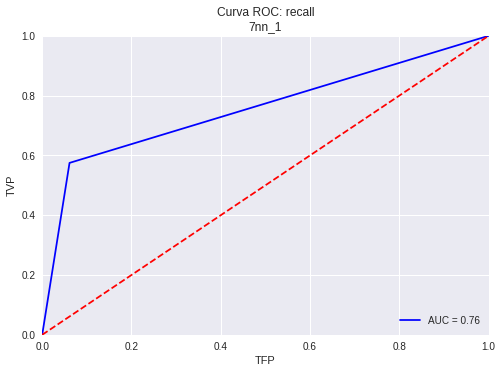

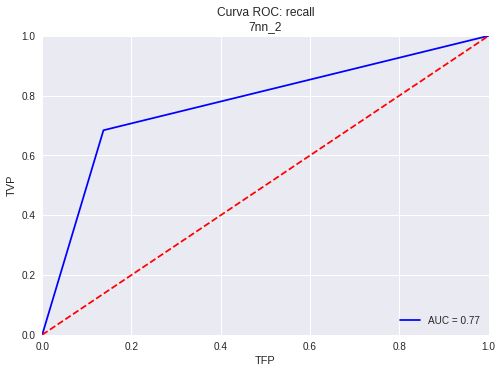

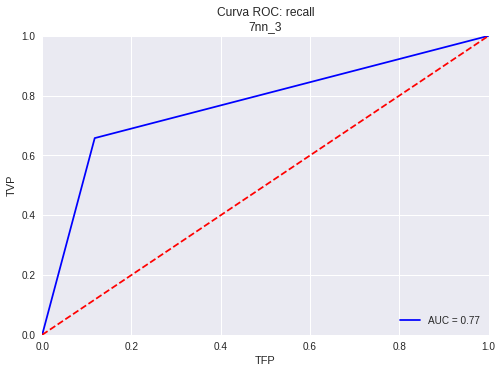

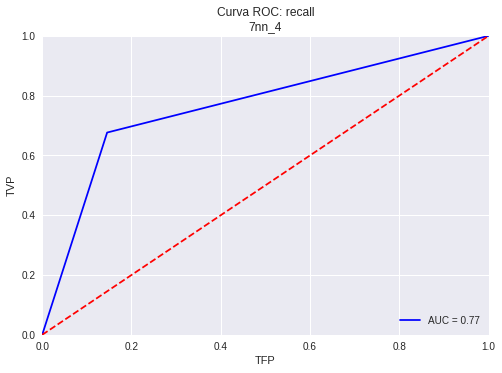

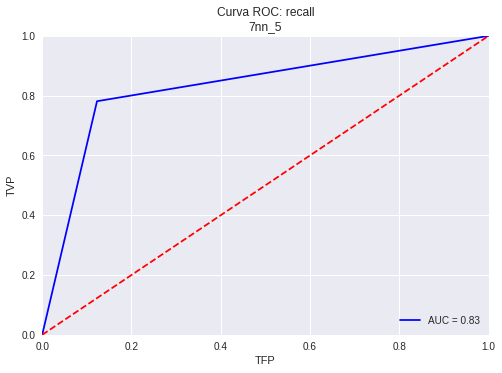

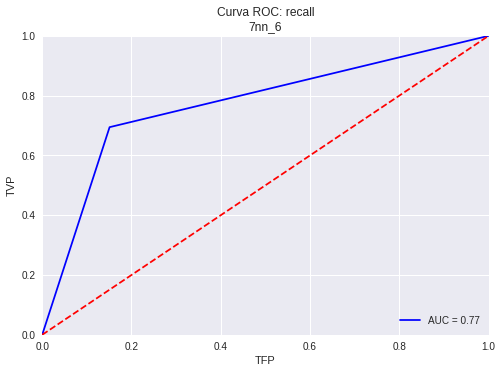

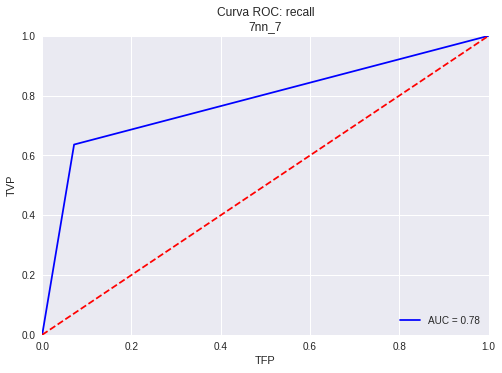

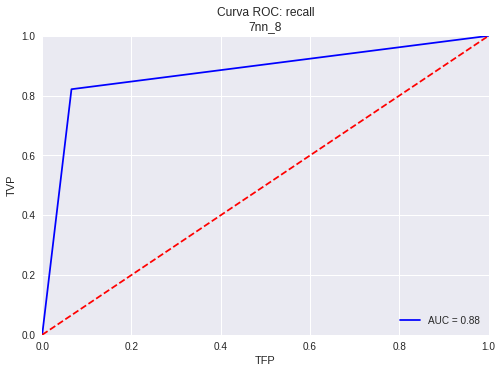

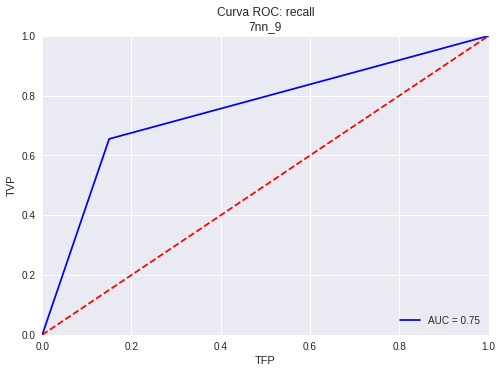

In [12]:
# Plotting ROC curve

# Recall
clf_rec = classificacao(dataset, columns, target, specificity_score, u'recall', folds=10, plot=True)

# 3- Explique o desempenho dos classificadores que você treinou na questão anterior pela curva ROC. Como a AUC sintetiza a curva ROC e como podemos utilizá-la para comparar classificadores?

Curvas ROC permitem uma melhor comparação de classificadores, pois são insensíveis a mudanças na distribuição das classes.

A AUC sintetiza a curva ROC através do cálculo da área sob a curva, fornecendo uma estimativa para o desempenho dos classificadores. Ela gera um valor contínuo no intervalo [0,1], quanto mais próxima a curva ROC se aproxima do ponto da predição perfeita, mais o valor da AUC se aproxima de 1.

A AUC é uma boa forma de avaliar um sistema de classificação binária.

## Desempenho dos classificadores

### Medida de especificidade
Em relação aos classificadores da medida de especificidade notamos que houve uma alta variabilidade tanto na curva ROC como na AUC a respeito do perceptron. Os outros classificadores tiveram um desempenho mais consistente, no geral o k-NN e a árvore de decisão apresentaram um desempenho parecido entre si, tanto em curvas ROC como em AUC. Como já havia sido evidenciado na análise realizada questão 1.


### Medida de revocação
Podemos ver que para a medida de revocação, os resultados das curvas ROC e AUC são bem semelhantes aos da medida de especificidade, contrastando com o resultado observado na questão 1.

#4- A decisão se um classificador é melhor que outro pode muitas vezes ser arbitrária e subjetiva, a fim de reduzir essa subjetividade e arbitrariedade utilizamos o teste de hipótese para julgar quando um é melhor que outro. [...] Execute o 10-fold Cross Validation em dois algoritmos, escolha uma métrica que você ache adequada e avalie pelo teste de hipótese qual dos dois é o melhor com nível de significância de 5%.

Usaremos o seguinte teste de hipótese:

$H_0=$"O classificador Perceptron tem desempenho igual ao o 7nn"

$H_1=$"O classificador Perceptron tem desempenho diferente do 7nn"

In [13]:
# Selecionando a medida de avaliação specificity e 2 de seus classificadores
clf_a = clf_spec['results']['3nn']
clf_b = clf_spec['results']['7nn']
  
from scipy import stats

# importando a função do t test para amostrar independentes
from scipy.stats import ttest_ind

# Aplicando o t_test para avaliar se podemos rejeitar a hipótese nula
print(ttest_ind(clf_a, clf_b))

Ttest_indResult(statistic=-0.6474737957341908, pvalue=0.5254979456596535)


Pelo P-valor resultante, não podemos rejeitar a hipótese nula, ou seja, os classificadores podem ou não ter desempenhos diferentes, com o nível de significância igual a 5%.